# Basic Model | AI Art


In [15]:
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from utils import (
    build_sequential_model,
    load_augmented_data,
    plot_performance_curves,
    save_model_history,
    load_model_history,
)
import PIL

PIL.Image.MAX_IMAGE_PIXELS = None

In [16]:
model_name = "basic_model_ai_art"
dataset_base_path = "./datasets/AI art"

# Forcefully train the model
force_model_train = False

# Don't save the model
no_save = False

In [17]:
# Load saved model and its history
model_history_loaded, classifier, history = load_model_history(model_name)

In [18]:
# Building model
if not model_history_loaded:
    classifier = build_sequential_model(
        layers=[
            Convolution2D(100, (3, 3), activation="relu", input_shape=(32, 32, 3)),
            MaxPooling2D(2, 2),
            Convolution2D(100, (3, 3), activation="relu"),
            MaxPooling2D(2, 2),
            Flatten(),
            Dropout(0.5),
            Dense(50, activation="relu"),
            Dense(2, activation="softmax"),
        ]
    )

In [19]:
# Model summary
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 100)       2800      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 100)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 100)       90100     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 100)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3600)              0         
                                                                 
 dropout (Dropout)           (None, 3600)              0

In [20]:
# Load augmented image generators
train_generator, validation_generator = load_augmented_data(dataset_base_path)

Found 17307 images belonging to 2 classes.
Found 4328 images belonging to 2 classes.


In [21]:
# Train model
if not model_history_loaded or force_model_train:
    history = classifier.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator,
    )
    history=history.history

In [22]:
# Save model
if not model_history_loaded or (force_model_train and not no_save) or not no_save:
    save_model_history(classifier, history, model_name)

INFO:tensorflow:Assets written to: ./models/basic_model_ai_art/model\assets


INFO:tensorflow:Assets written to: ./models/basic_model_ai_art/model\assets


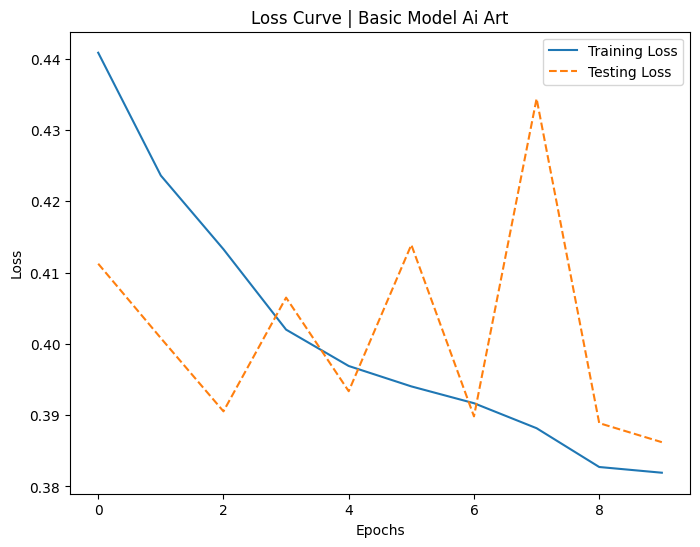

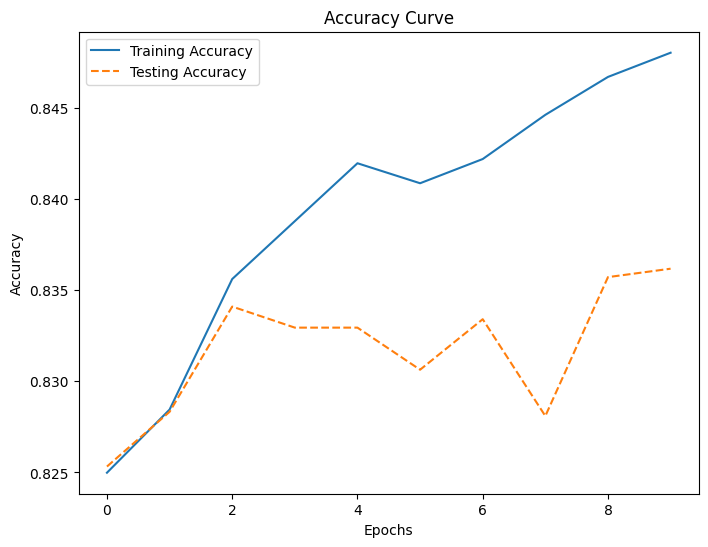

In [23]:
# Plot performance curves
plot_performance_curves(history, model_name)